# Creating income groups

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os

## Creating path for folder

In [5]:
path = r'/Users/ceciliamoura/Desktop/Career Foundry/Achievement4/Instacart Basket Analysis'

## Importing files

In [9]:
# Importing subset with only high activity customers

In [7]:
instacart = pd.read_pickle(os.path.join (path, 'Data', 'Final Prepared Data', 'IC_high_activity_2.pkl'))

In [11]:
instacart.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'order_number', 'order_day_of_week', 'order_time',
       'days_since_prior_order', 'product_name', 'aisle_id', 'department_id',
       'prices', 'Gender', 'State', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'max_order', 'max_order_per_user',
       'products_per_order', 'order_cost', 'Region', 'age_group',
       'loyalty_flag', 'mean_order_cost_per_user', 'spending_flag',
       'income_group', 'median_days_since_prior_order_per_user', 'freq_buyer'],
      dtype='object')

In [12]:
instacart.shape

(30963518, 32)

## 1. Creating quartiles 

In [14]:
# Group income into quartiles

#Q1 = low = <25th (67.292)
#Q2 = medium = between 25th and 50th percentiles (67.292 and 96.765)
#Q3 = high = between 50th and 75th percentiles (96.765 and 128.102)
#Q4 = very high = >75th percentile

instacart['income_group'] = pd.qcut(instacart['income'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

In [15]:
instacart['income_group'].value_counts()

income_group
Low          7741104
Medium       7740979
Very High    7740813
High         7740622
Name: count, dtype: int64

In [16]:
instacart['income'].describe()

count    3.096352e+07
mean     9.967570e+04
std      4.314141e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

## 2. Creating a chart of income group distribution by region

In [9]:
# Creating a subset with unique entries for each user_id

bar_income_groups = instacart[['income_group', 'user_id', 'Region', 'mean_order_cost_per_user']]

In [19]:
bar_income_groups.shape

(30963518, 4)

In [11]:
# Creating a subset withou duplicates

bar_income_groups_nodups = bar_income_groups.drop_duplicates()

In [21]:
bar_income_groups_nodups.shape

(162631, 4)

In [22]:
bar_income_groups_nodups['income_group'].value_counts(dropna = False)

income_group
Low          48271
High         38403
Very High    38109
Medium       37848
Name: count, dtype: int64

/var/folders/30/j2w0rj9n75x1by3sr86s740h0000gn/T/ipykernel_19129/1899137358.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(x='Region', y='count', hue='income_group', data=bar_income_groups_nodups.groupby(['Region', 'income_group']).size().reset_index(name='count'))


<Axes: xlabel='Region', ylabel='count'>

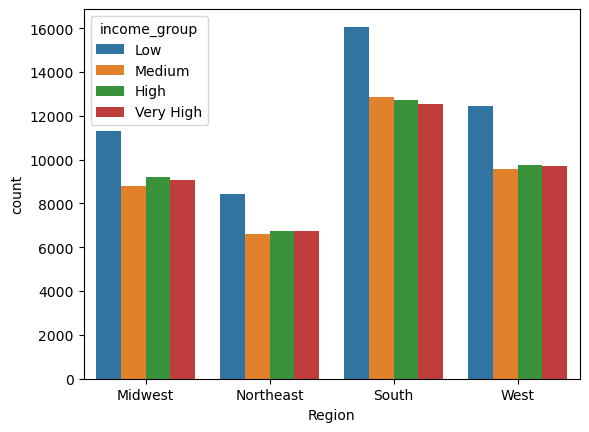

In [31]:
# Stacked bar chart

sns.barplot(x='Region', y='count', hue='income_group', data=bar_income_groups_nodups.groupby(['Region', 'income_group']).size().reset_index(name='count'))

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

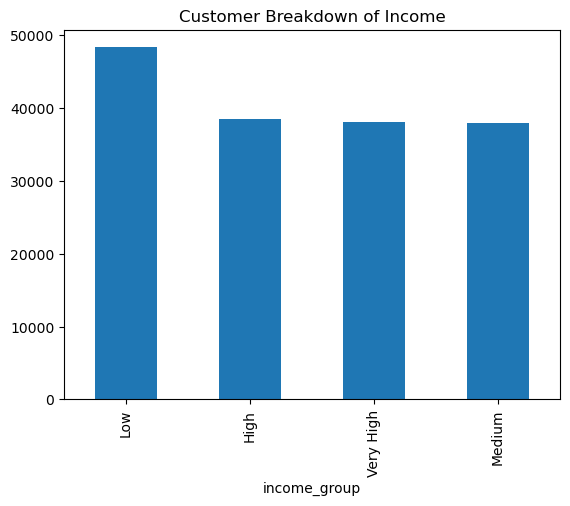

In [21]:
#Creating a bar chart

bar_income = bar_income_groups_nodups['income_group'].value_counts().plot.bar(title = 'Customer Breakdown of Income')

In [41]:
# exporting plot


plt.savefig(os.path.join(path, 'Analysis', 'Final Visualization', 'age_groups_counts.png'),dpi=100)

In [26]:
# exporting plot

age_groups_bar.figure.savefig(os.path.join(path, 'Analysis','Final Visualization', 'age_groups_bar.jpeg'))

NameError: name 'age_groups_bar' is not defined

## 3. Exporting 

In [ ]:
instacart.to_pickle(os.path.join(path, 'Data', 'Final Prepared Data', 'IC_high_activity_2.pkl'))

In [ ]:
instacart.to_pickle(os.path.join(path, 'Data', 'Final Prepared Data', 'backup', 'IC_high_activity_2.pkl'))